In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/bank.csv', sep=';')

# Encode target variable
df['y'] = df['y'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})

# Encode categorical features and save encoders
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le   # Save encoder for later use

# Split data
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

# --- FUNCTION FOR USER INPUT PREDICTION ---
def predict_from_input():
    user_data = {}

    for col in X.columns:
        if col in categorical_cols:
            val = input(f"Enter {col} (options: {list(encoders[col].classes_)}): ")
            val = val.strip().lower()
            # Encode user input
            if val in encoders[col].classes_:
                user_data[col] = encoders[col].transform([val])[0]
            else:
                print(f"Invalid value for {col}, defaulting to first class.")
                user_data[col] = 0
        else:
            val = float(input(f"Enter {col} (numeric): "))
            user_data[col] = val

    # Convert to dataframe for prediction
    user_df = pd.DataFrame([user_data])
    prediction = clf.predict(user_df)[0]
    print("\n🔮 Prediction:", "YES,Customer will purchase a product or service." if prediction == 1 else "NO,Customer will not purchase a product or service.")

# --- Example Run ---
predict_from_input()


Enter age (numeric): 25
Enter job (options: ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']): student
Enter marital (options: ['divorced', 'married', 'single']): single
Enter education (options: ['primary', 'secondary', 'tertiary', 'unknown']): secondary
Enter default (options: ['no', 'yes']): yes
Enter balance (numeric): 4500
Enter housing (options: ['no', 'yes']): yes
Enter loan (options: ['no', 'yes']): no
Enter contact (options: ['cellular', 'telephone', 'unknown']): telephone
Enter day (numeric): 16
Enter month (options: ['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']): sep
Enter duration (numeric): 180
Enter campaign (numeric): 4
Enter pdays (numeric): 225
Enter previous (numeric): 3
Enter poutcome (options: ['failure', 'other', 'success', 'unknown']): other

🔮 Prediction: NO (Not Subscribed)


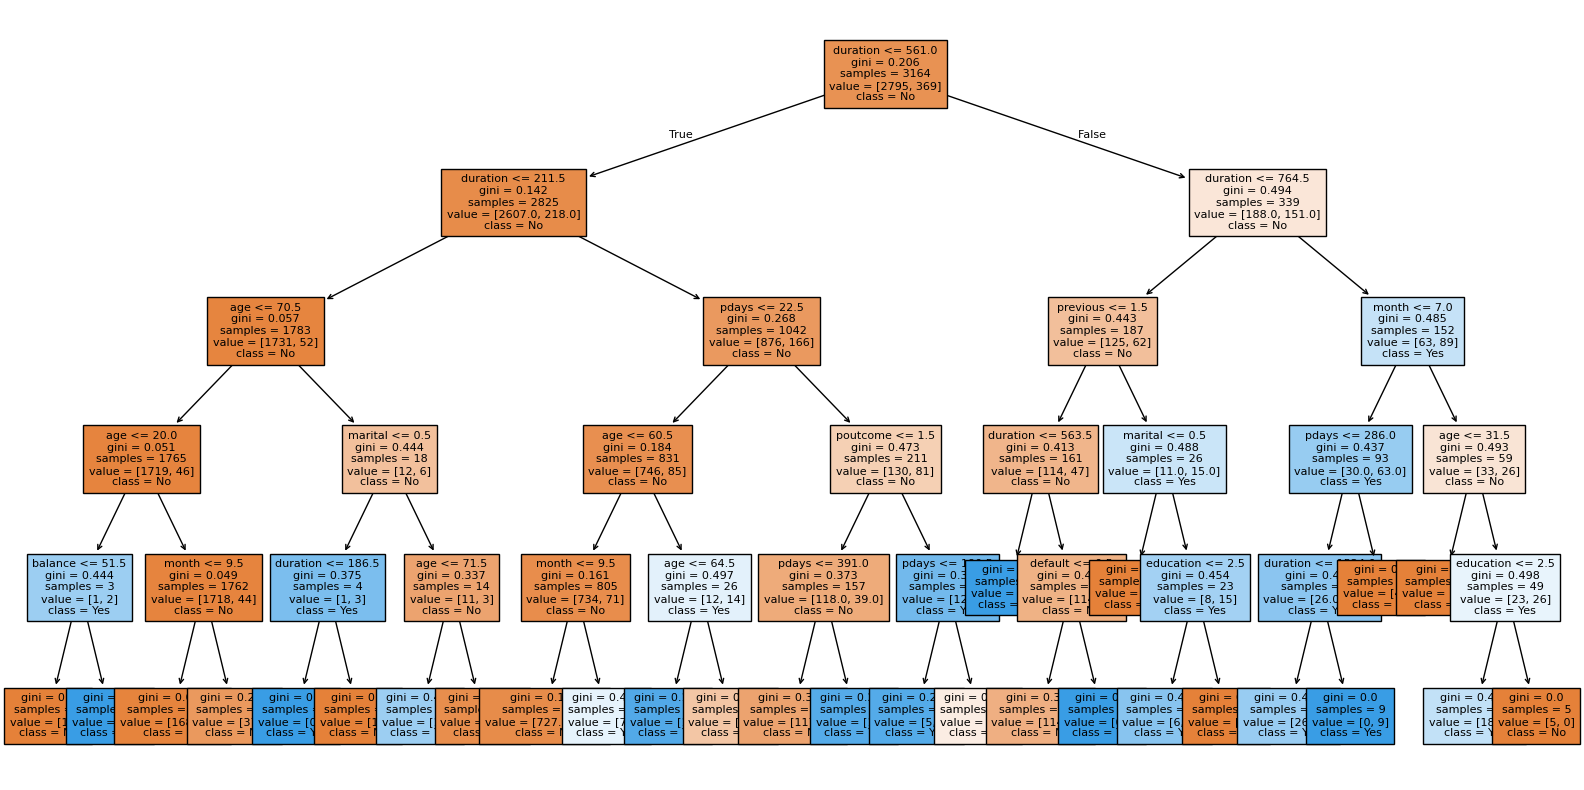

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No','Yes'], filled=True, fontsize=8)
plt.show()